<a href="https://colab.research.google.com/github/Nilufayeasmin299/Phishig-detection-using-both-machine-learning-and-deep-learning-techniques/blob/main/Phishing_with_feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#importing all necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from xgboost import XGBClassifier

In [ ]:
#load dataset
df=pd.read_csv('/content/gdrive/MyDrive/Second paper/Dataset/Training Dataset.csv')
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,0,1,1,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,1,-1,-1,0,0,-1,1,1,0,1,1,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,1,1,1,0,0,-1,1,1,0,-1,1,-1,1,-1,-1,0,-1,1,1,1,1


In [ ]:
df.shape

(11055, 31)

In [ ]:
df.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

In [ ]:
df['Result'].value_counts()

 1    6157
-1    4898
Name: Result, dtype: int64

In [ ]:
y=df['Result']
X=df.drop('Result',axis=1)

In [ ]:
X.shape, y.shape

((11055, 30), (11055,))

In [ ]:
# Splitting the dataset into train and test sets: 80-20 split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((8844, 30), (2211, 30))

In [ ]:
from sklearn.feature_selection import mutual_info_classif
#determine the mutual information
mutual_info=mutual_info_classif(X_train,y_train)
mutual_info

array([0.0100492 , 0.00615215, 0.00972376, 0.00056518, 0.        ,
       0.0773999 , 0.08400896, 0.3415224 , 0.02218913, 0.00846552,
       0.        , 0.00604557, 0.02994399, 0.32948048, 0.03444258,
       0.02578499, 0.00207781, 0.01228084, 0.00953912, 0.        ,
       0.        , 0.00172539, 0.00425907, 0.01192146, 0.00488024,
       0.07400269, 0.00791547, 0.01444258, 0.        , 0.01171643])

In [ ]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=X_train.columns
mutual_info.sort_values(ascending=False)

SSLfinal_State                 0.341522
URL_of_Anchor                  0.329480
having_Sub_Domain              0.084009
Prefix_Suffix                  0.077400
web_traffic                    0.074003
Links_in_tags                  0.034443
Request_URL                    0.029944
SFH                            0.025785
Domain_registeration_length    0.022189
Google_Index                   0.014443
Abnormal_URL                   0.012281
age_of_domain                  0.011921
Statistical_report             0.011716
having_IP_Address              0.010049
Shortining_Service             0.009724
Redirect                       0.009539
Favicon                        0.008466
Page_Rank                      0.007915
URL_Length                     0.006152
HTTPS_token                    0.006046
DNSRecord                      0.004880
Iframe                         0.004259
Submitting_to_email            0.002078
popUpWidnow                    0.001725
having_At_Symbol               0.000565


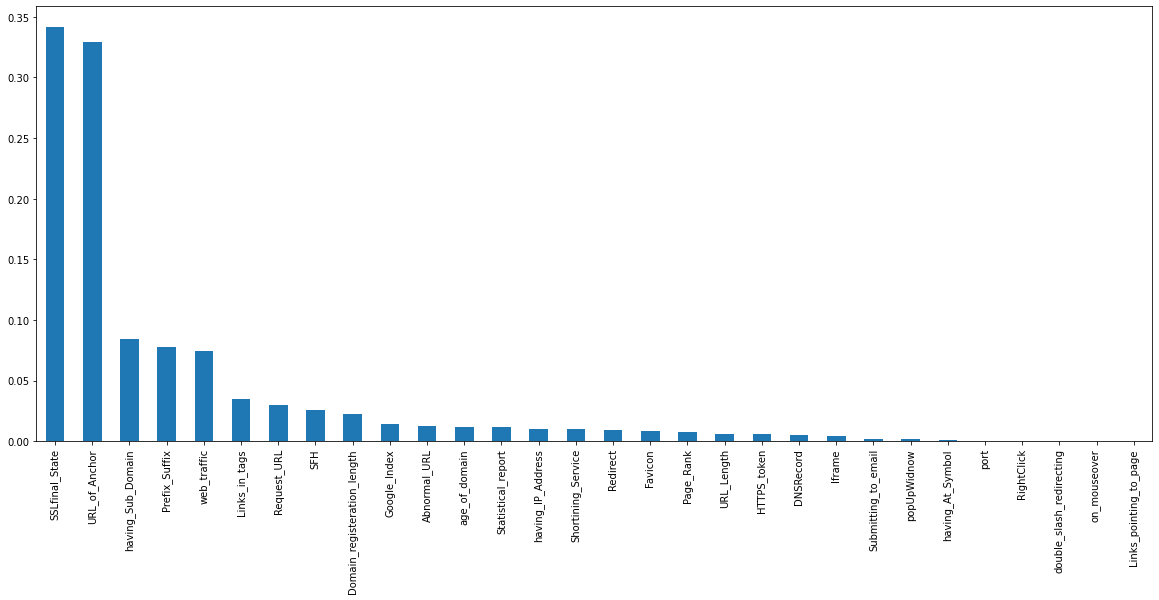

In [ ]:
#Let's plot the orderded mutual_info valuesper feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8)) 

In [ ]:
from sklearn.feature_selection import SelectKBest

In [ ]:
#Now we will select top 15 featues 
sel_fifteen_cols=SelectKBest(mutual_info_classif,k=15)
sel_fifteen_cols.fit(X_train,y_train)
X_train.columns[sel_fifteen_cols.get_support()]

Index(['having_At_Symbol', 'Prefix_Suffix', 'having_Sub_Domain',
       'SSLfinal_State', 'Domain_registeration_length', 'HTTPS_token',
       'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH', 'on_mouseover',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Links_pointing_to_page'],
      dtype='object')

In [ ]:
FinalData=df.drop(['having_IP_Address', 'URL_Length', 'Shortining_Service',
        'double_slash_redirecting', 'Favicon', 'port',  'Submitting_to_email', 
        'Abnormal_URL', 'Redirect',  'RightClick', 'popUpWidnow', 'Iframe',
         'Page_Rank','Google_Index',  'Statistical_report'], axis=1)

In [ ]:
FinalData.head()

,having_At_Symbol,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,on_mouseover,age_of_domain,DNSRecord,web_traffic,Links_pointing_to_page,Result
0,1,-1,-1,-1,-1,-1,1,-1,1,-1,1,-1,-1,-1,1,-1
1,1,-1,0,1,-1,-1,1,0,-1,-1,1,-1,-1,0,1,-1
2,1,-1,-1,-1,-1,-1,1,0,-1,-1,1,1,-1,1,0,-1
3,1,-1,-1,-1,1,-1,-1,0,0,-1,1,-1,-1,1,-1,-1
4,1,-1,1,1,-1,1,1,0,0,-1,-1,-1,-1,0,1,1


In [ ]:
FinalData.to_csv('New_data')